In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

from sklearn import preprocessing 

In [2]:
# Import some data

iris = pd.read_csv('/Users/chira/Downloads/Iris.csv',index_col=0)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [4]:
iris.iloc[:,0:4]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [5]:
x = iris.iloc[:,0:4]

In [6]:
y = iris.iloc[:,4]

In [7]:
y

Id
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
            ...      
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
150    Iris-virginica
Name: Species, Length: 150, dtype: object

In [8]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
colnames = list(iris.columns)

In [10]:
colnames

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

In [11]:
# Split the dataset into Xtrain and xtest , Y train and y test.

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [13]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [14]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)

In [15]:
model.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(125.55000000000001, 190.26, 'X[2] <= 2.45\nentropy = 1.584\nsamples = 120\nvalue = [42, 38, 40]'),
 Text(83.7, 135.9, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 78\nvalue = [0, 38, 40]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 4.95\nentropy = 0.527\nsamples = 42\nvalue = [0, 37, 5]'),
 Text(41.85, 27.180000000000007, 'entropy = 0.183\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 4.85\nentropy = 0.183\nsamples = 36\nvalue = [0, 1, 35]'),
 Text(209.25, 27.180000000000007, 'entropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(292.95, 27.180000000000007, 'entropy = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]

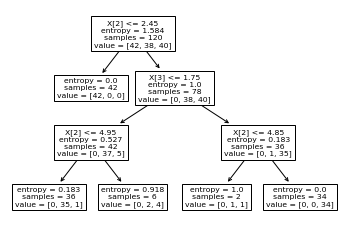

In [18]:
#plot the the decsion tree
tree.plot_tree(model)

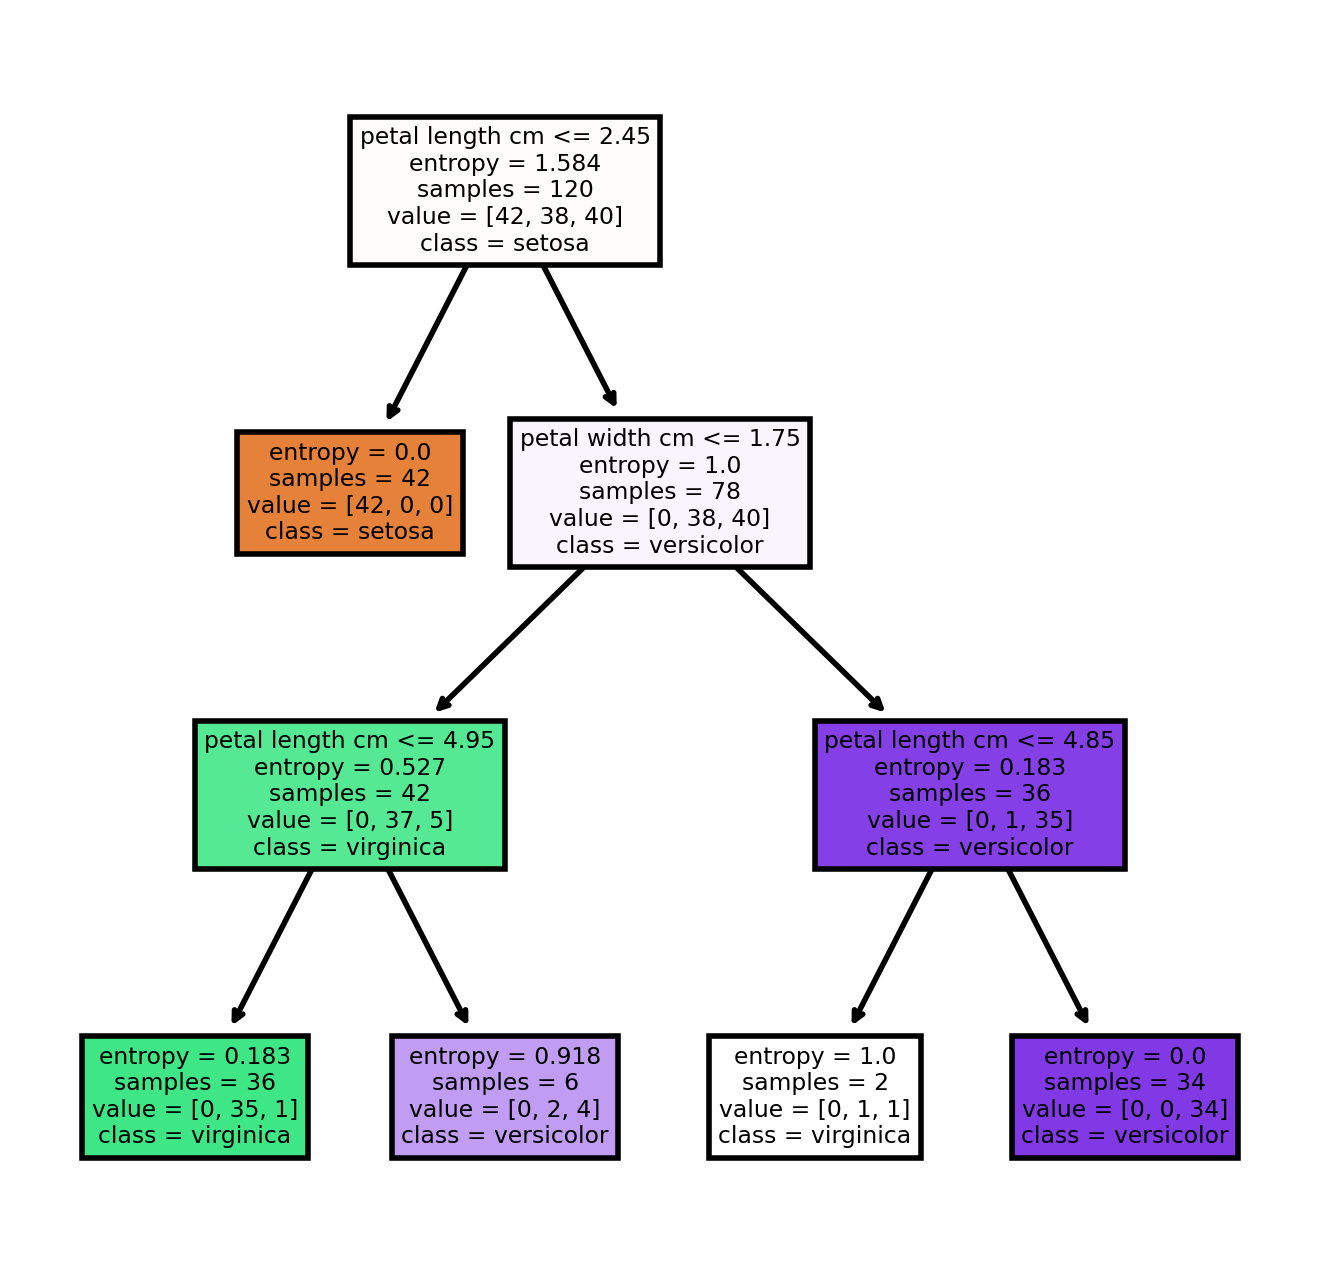

In [19]:
fn = ['sepal length cm', 'sepal width cm','petal length cm','petal width cm']
cn = ['setosa','virginica','versicolor']

fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=400)
tree.plot_tree(model,feature_names = fn,class_names=cn,filled=True);

In [20]:
# predicting on the test data


preds = model.predict(x_test)
pd.Series(preds).value_counts()

Iris-versicolor    13
Iris-virginica      9
Iris-setosa         8
dtype: int64

In [21]:
pd.crosstab(y_test,preds)

col_0,Iris-setosa,Iris-versicolor,Iris-virginica
Species,,,
Iris-setosa,8,0,0
Iris-versicolor,0,12,0
Iris-virginica,0,1,9


In [22]:
# Accuracy for C5 Decision tree
np.mean(preds==y_test)

0.9666666666666667

## Building Decision Tree With CART

In [23]:
from sklearn.tree import DecisionTreeClassifier

model_gini = DecisionTreeClassifier(criterion='gini',max_depth=3)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [24]:
# Predcition and validation 

pred=model.predict(x_test)
np.mean(preds==y_test)



0.9666666666666667